In [1]:
#Load required libraries
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv("dataset_monika.csv")
#View the data
df.head()

#Basic info about data
df.info()

#Describe the data
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [2]:
#Find duplicate values
df.duplicated().sum()

0

In [3]:
#Find null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [4]:
#Replace null values
df.replace(np.nan,'0',inplace=True)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [5]:
#Types of data
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                       object
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [6]:
#Correlation
df.corr()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
over_time,-0.096737,-0.088557,0.674887,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,-0.148753,0.421594,-0.122089,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


<AxesSubplot: >

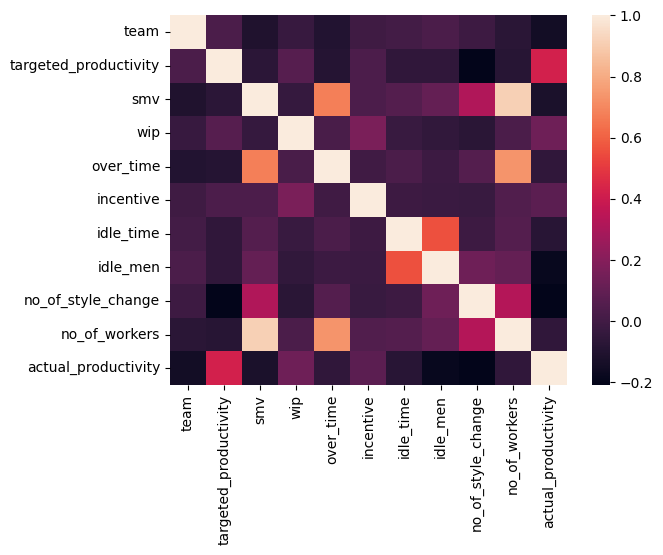

In [2]:
#Correlation plot (Heatmap)
sns.heatmap(df.corr())

In [8]:
#Exploratory Data Analysis EDA
#Convert date string column to Date object
df["date"] = pd.to_datetime(df["date"])
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

<AxesSubplot: ylabel='department'>

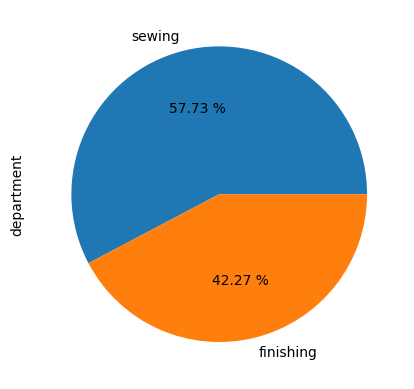

In [3]:
#mergeing the two split finishing
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing')
df.department.value_counts().plot.pie(autopct='%.2f %%')
#As we can see, 58% of employees work in sewing while 42% are in finishing.

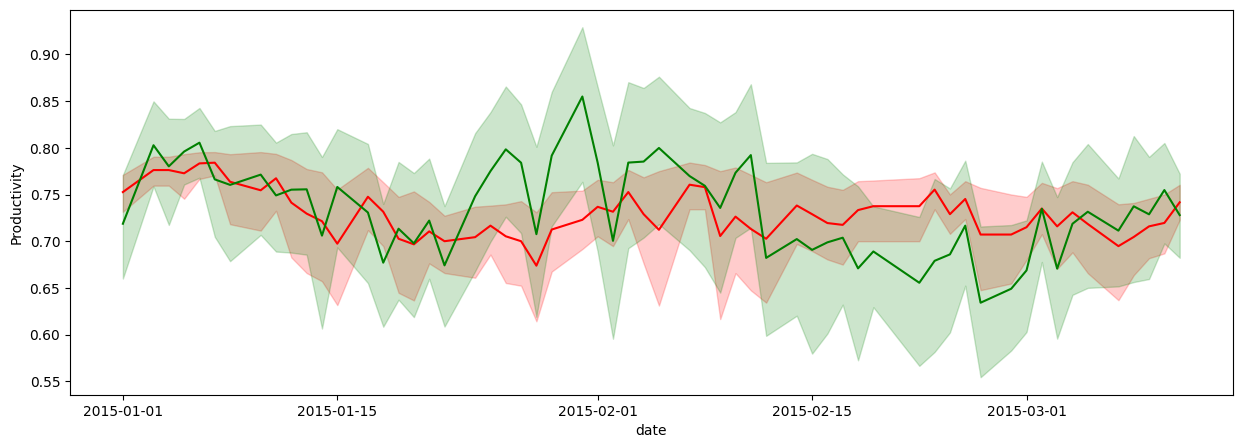

In [10]:
#Actual VS target productivity
plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()
#tradeoff is not that consistent, but overall productivity is on the line.

<AxesSubplot: xlabel='day', ylabel='count'>

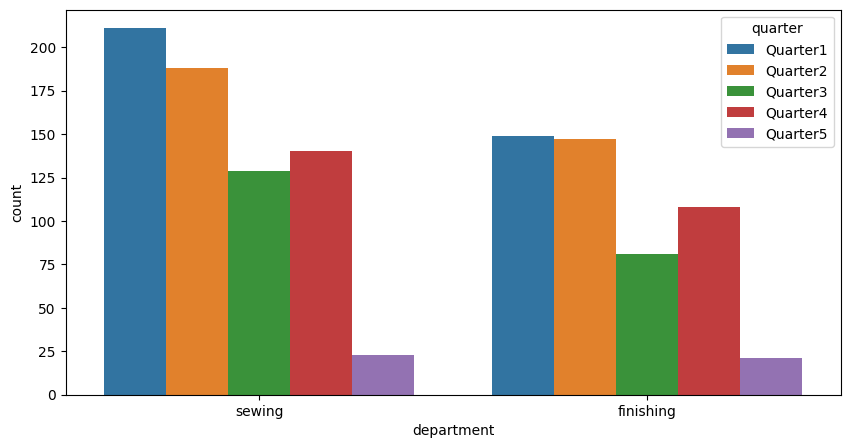

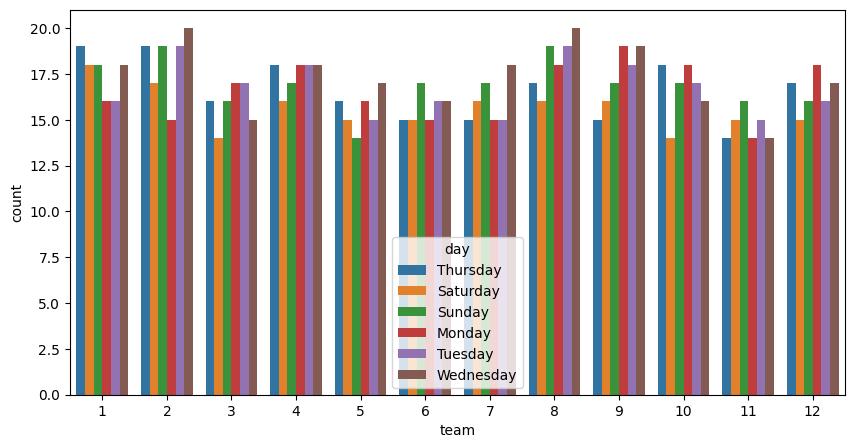

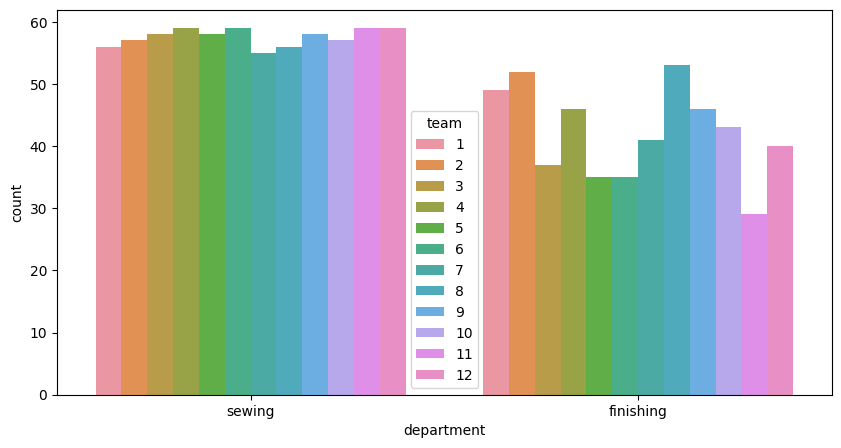

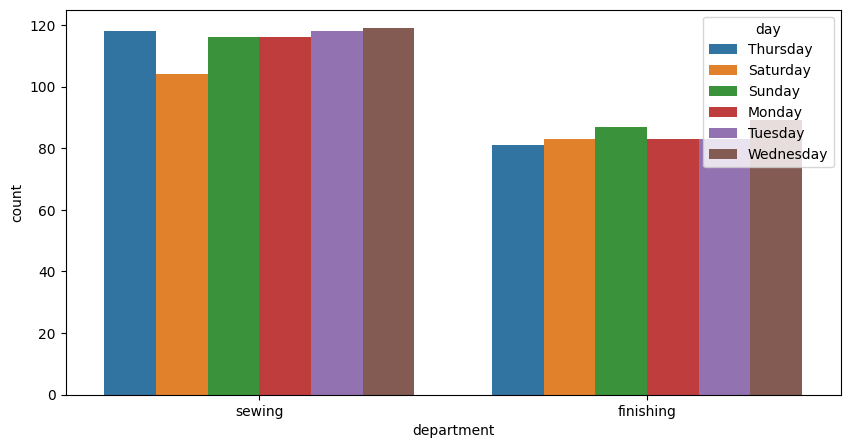

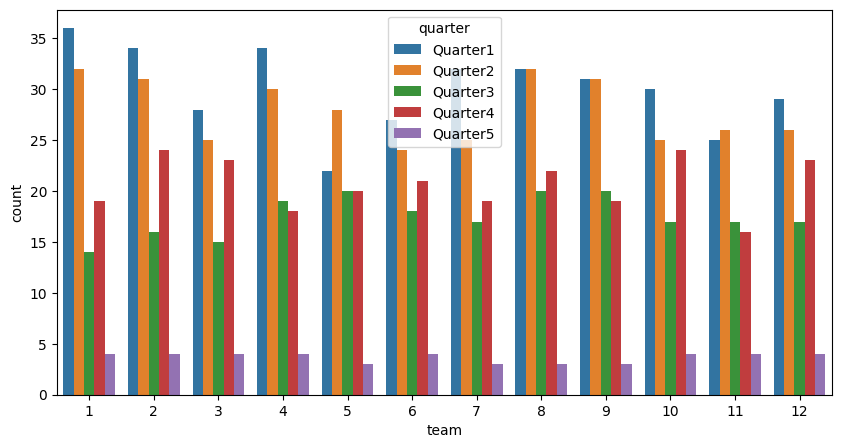

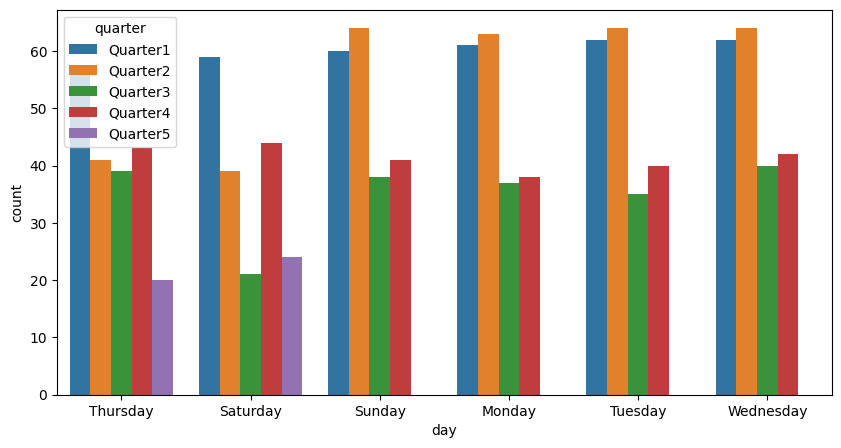

In [11]:
#Influence of a day of the week,team, quarter or department on productivity
plt.figure(figsize=(10,5))
sns.countplot(x='department',hue='quarter',data=df)

plt.figure(figsize=(10,5))
sns.countplot(x='team',hue='day',data=df)

plt.figure(figsize=(10,5))
sns.countplot(x='department',hue='team',data=df)

plt.figure(figsize=(10,5))
sns.countplot(x='department',hue='day',data=df)

plt.figure(figsize=(10,5))
sns.countplot(x='team',hue='quarter',data=df)

plt.figure(figsize=(10,5))
sns.countplot(x='day',hue='quarter',data=df)

In [12]:
#Productivity mainly depends on the target productivity
#having a target will motivate and boost the employees
#There is strong positive correlation between actual_productivity and incentive 
#after we remove outliers and zero-value incentives.
#There is a relatively strong positive correlation between 
#median of actual_productivity and targeted_productivity.

In [13]:
#Preprocessing and cleaning data
df.date


0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [14]:
#Dropping Columns
#we already have a day column
#month column will suffice instead of the complete date
df['month']=df['date'].dt.month
df.drop(['date'],axis=1, inplace=True)

#the wip has a lot of null values so we drop it
df.drop(['wip'],axis=1, inplace=True)


In [15]:
#In the data there a few non-numerical columns
#Should we encode them as most machine learning algorithms work only with numerical data?
#splitting the data into independent and dependent columns 


In [16]:
#PREPARING DATASET FOR FOR TRAINING AND TESTING THE MODELS
#Performing Label Encoding 
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for column in df.columns:
    df[column]=label_encoder.fit_transform (df[column])
    df
    #we now have only numerical values in our data frame

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cfd52dc-a542-4ebd-bf48-5f64d542324f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>